In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Credit_Card_Applications.csv')
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)

In [5]:
from minisom import MiniSom

In [6]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [7]:
som.random_weights_init(x_scaled)

In [8]:
som.train_random(data=x_scaled, num_iteration=200)

Visualizing the som

In [9]:
from pylab import bone,pcolor,colorbar,plot,show

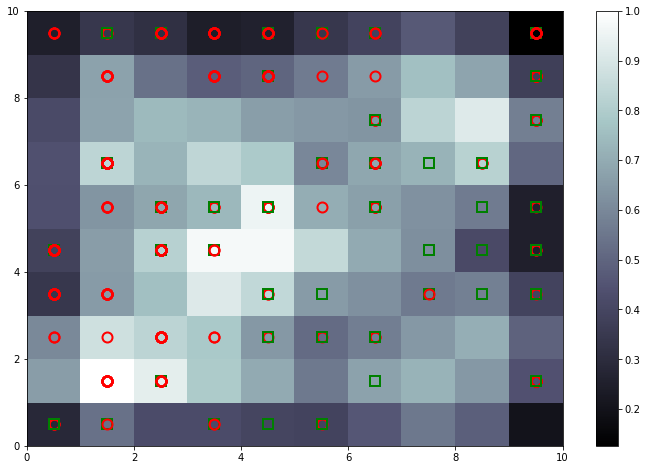

In [13]:
plt.figure(figsize=(12,8))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(x_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [15]:
mappings=som.win_map(x_scaled)
mappings

defaultdict(list,
            {(2,
              9): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.50077484, 1.        , 0.21052632, 0.04607143, 0.5       ,
                     0.23076923, 0.875     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.07      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
                     0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.75215934, 1. 

In [24]:
frauds=np.concatenate((mappings[(1,1)],mappings[(3,4)],mappings[(4,5)]),axis=0)
frauds

array([[1.14488105e-01, 0.00000000e+00, 1.50375940e-01, 2.53571429e-02,
        5.00000000e-01, 6.15384615e-01, 3.75000000e-01, 8.77192982e-03,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 1.00000000e+00,
        5.00000000e-01, 1.20000000e-01, 4.00000000e-05],
       [3.96746073e-01, 0.00000000e+00, 5.38345865e-02, 3.39285714e-01,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 6.14035088e-02,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-01, 1.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 1.00000000e-04],
       [4.17712801e-01, 0.00000000e+00, 4.76691729e-02, 1.78571429e-02,
        5.00000000e-01, 1.53846154e-01, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 1.00000000e+00, 8.95522388e-02, 1.00000000e+00,
        5.00000000e-01, 1.20000000e-01, 3.50000000e-04],
       [7.92318874e-01, 0.00000000e+00, 3.38345865e-02, 5.89285714e-03,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 3.50877193e-02,
        0.00000000e+00, 1.00000000e+0

In [25]:
list_of_frauds=scaler.inverse_transform(frauds)
list_of_frauds

array([[1.5594305e+07, 0.0000000e+00, 2.3750000e+01, 7.1000000e-01,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.4000000e+02, 5.0000000e+00],
       [1.5664793e+07, 0.0000000e+00, 1.7330000e+01, 9.5000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+01, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.1000000e+01],
       [1.5670029e+07, 0.0000000e+00, 1.6920000e+01, 5.0000000e-01,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.4000000e+02, 3.6000000e+01],
       [1.5763579e+07, 0.0000000e+00, 1.6000000e+01, 1.6500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [26]:
pd.DataFrame(list_of_frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15594305.0,0.0,23.75,0.710,2.0,9.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,240.0,5.0
1,15664793.0,0.0,17.33,9.500,2.0,6.0,4.0,1.750,0.0,1.0,10.0,1.0,2.0,0.0,11.0
2,15670029.0,0.0,16.92,0.500,2.0,3.0,4.0,0.165,0.0,1.0,6.0,1.0,2.0,240.0,36.0
3,15763579.0,0.0,16.00,0.165,2.0,6.0,4.0,1.000,0.0,1.0,2.0,1.0,2.0,320.0,2.0
4,15662189.0,0.0,28.58,3.750,2.0,8.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,40.0,155.0
5,15793825.0,0.0,31.92,3.125,2.0,1.0,1.0,3.040,0.0,1.0,2.0,1.0,2.0,200.0,5.0
6,15696361.0,0.0,31.57,1.500,2.0,1.0,1.0,0.000,0.0,1.0,2.0,1.0,2.0,200.0,106.0
7,15568469.0,0.0,15.83,7.625,2.0,11.0,4.0,0.125,0.0,1.0,1.0,1.0,2.0,0.0,161.0
8,15782159.0,0.0,22.67,0.750,2.0,8.0,4.0,2.000,0.0,1.0,2.0,1.0,2.0,200.0,395.0
9,15586479.0,0.0,27.25,0.290,2.0,7.0,8.0,0.125,0.0,1.0,1.0,1.0,2.0,272.0,109.0
